In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import swifter
import re 

# === SYSTEM / MISC ===
import os
import warnings
warnings.filterwarnings('ignore')


In [74]:
import gc 
gc.collect()

1434

In [75]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 1. Cleaning and Data Extraction

In [76]:
df = pd.read_csv('../Dataset/WELFake_Dataset.csv')

In [77]:
df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,2,unbelievable! obama’s attorney general says mo...,"now, most of the demonstrators gathered last n...",1
2,3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
3,4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
4,5,about time! christian group sues amazon and sp...,all we can say on this one is it s about time ...,1


In [78]:
df.isna().sum()

Unnamed: 0      0
title           0
text          744
label           0
dtype: int64

In [79]:
df.dropna(inplace = True)

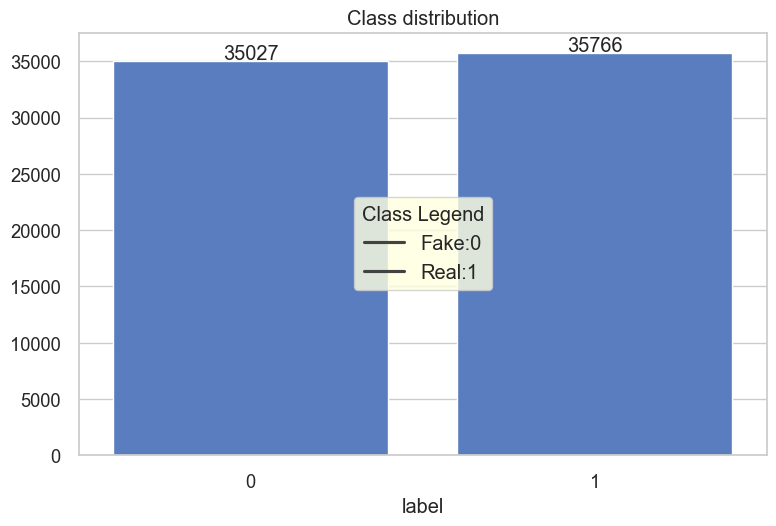

In [80]:
# Create the bar plot
ax = sns.barplot(x=df['label'].value_counts().index, 
                 y=df['label'].value_counts().values)
plt.title("Class distribution")

# Add legend
plt.legend(['Fake:0', 'Real:1'], loc='center', fontsize='medium', 
           frameon=True, facecolor='lightyellow', title='Class Legend')

# Add labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [81]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [82]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,unbelievable! obama’s attorney general says mo...,"now, most of the demonstrators gathered last n...",1
2,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
3,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
4,about time! christian group sues amazon and sp...,all we can say on this one is it s about time ...,1


Removing extra whitespaces.

In [83]:
def preprocess(text):
    text = text.lower()                      
    text = re.sub(r"\s+", " ", text)         
    return text.strip()                      

df['title'] = df['title'].swifter.apply(preprocess)
df['text'] = df['text'].swifter.apply(preprocess)

Pandas Apply: 100%|██████████| 70793/70793 [00:19<00:00, 3624.97it/s]


In [84]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,unbelievable! obama’s attorney general says mo...,"now, most of the demonstrators gathered last n...",1
2,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
3,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
4,about time! christian group sues amazon and sp...,all we can say on this one is it s about time ...,1


Saving, this dataset (cleansed of whitespaces).

In [85]:
df.to_csv('../Dataset/WELFake_Dataset.csv')